# Exploratory Data Analysis on Dataset - Terrorism 
<img src="ter_image.jpg" width="400px">

### Importing important libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
!pip install folium
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

big.csv
data
globalterrorismdb_0718dist.csv
jupyterlab.md
jupyterlab-slides.pdf
Lorenz.ipynb
lorenz.py
markdown_python.md
notebooks
TCGA_Data
ter_image.jpg
Untitled.ipynb



### Importing & cleaning data

In [4]:
terror=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', engine="python", error_bad_lines=False)
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

Skipping line 94959: unexpected end of data


Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

In [5]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Colombia
Regions with Highest Terrorist Attacks: South America
Maximum people killed in an attack are: 1384.0 that took place in United States


### Number of terrorist activities over years

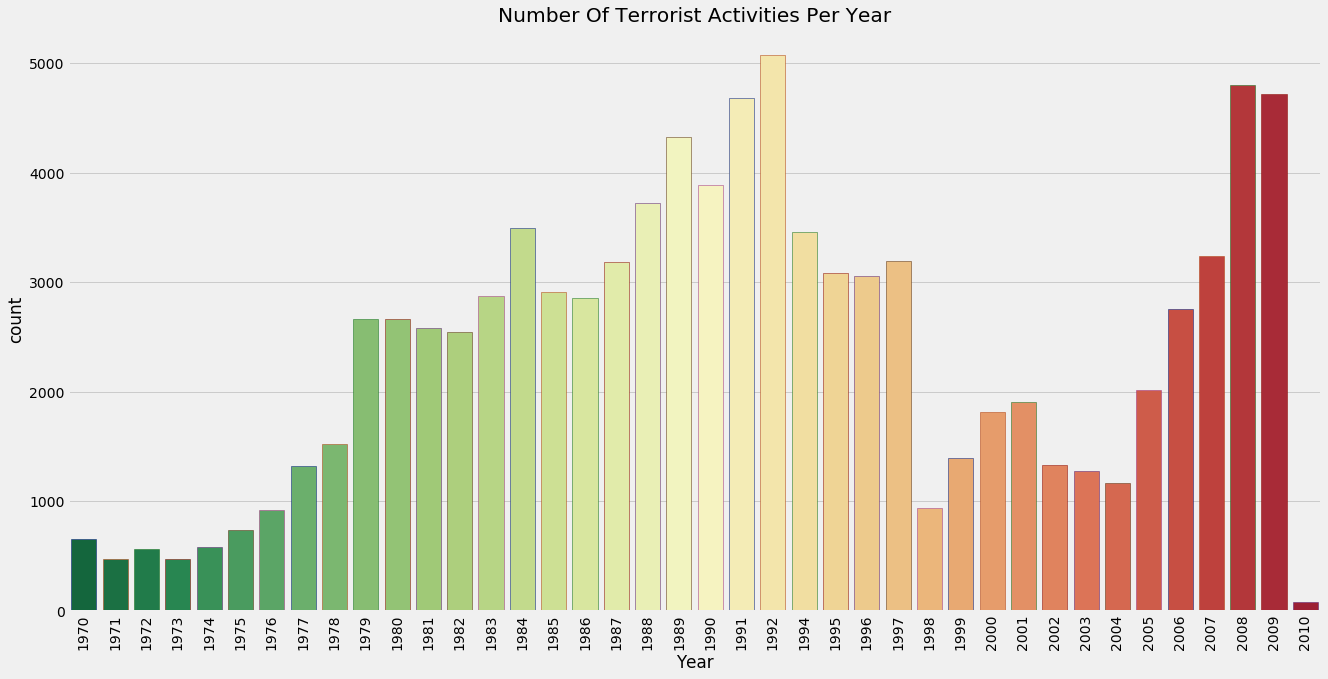

In [6]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Per Year')
plt.show()

### Different attacking methods used by the terrorist

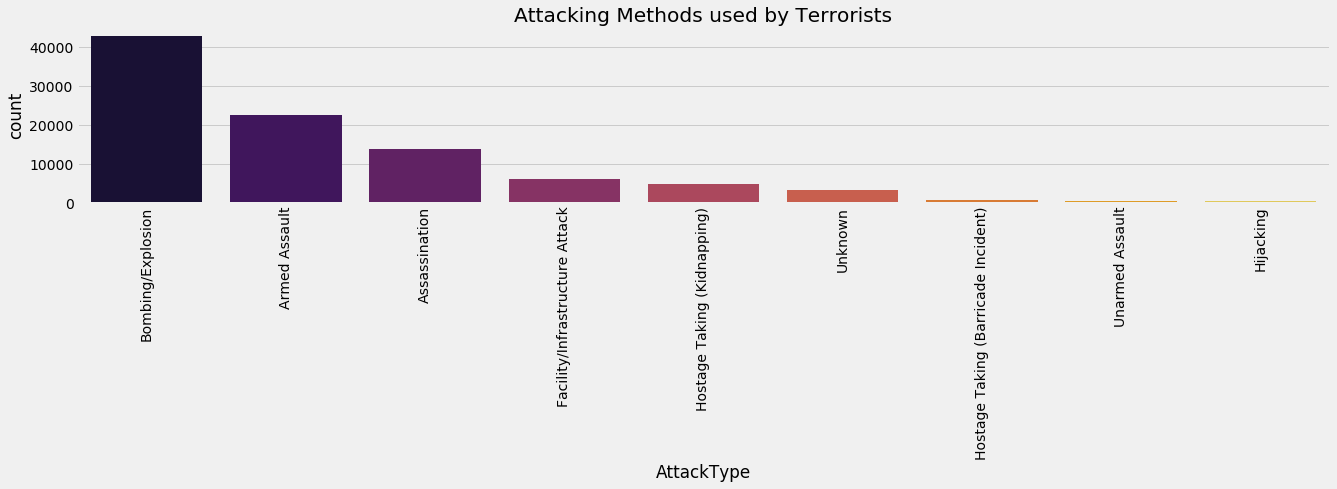

In [7]:
plt.subplots(figsize=(20,3))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods used by Terrorists')
plt.show()

### Type of people targeted by the terrorist

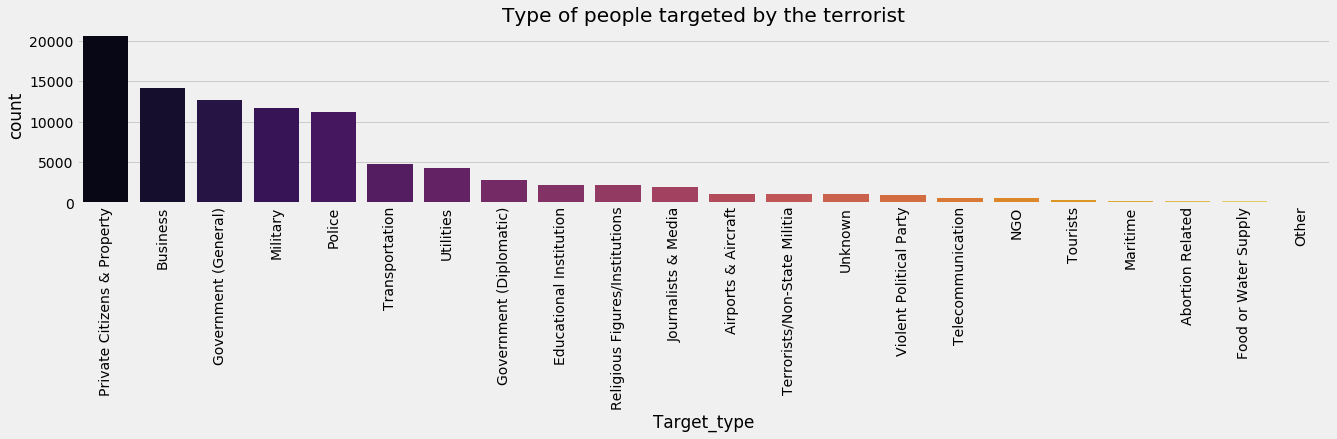

In [30]:
plt.subplots(figsize=(20,3))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Type of people targeted by the terrorist')
plt.show()

### Terrorism across all regions

In [31]:
terror_fol=terror.copy()
terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_fol=terror_fol[['latitude','longitude']][:5000]
country_fol=terror_fol['Country'][:5000]
city_fol=terror_fol['city'][:5000]
killed_fol=terror_fol['Killed'][:5000]
wound_fol=terror_fol['Wounded'][:5000]
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location_fol.index:
    info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
map2

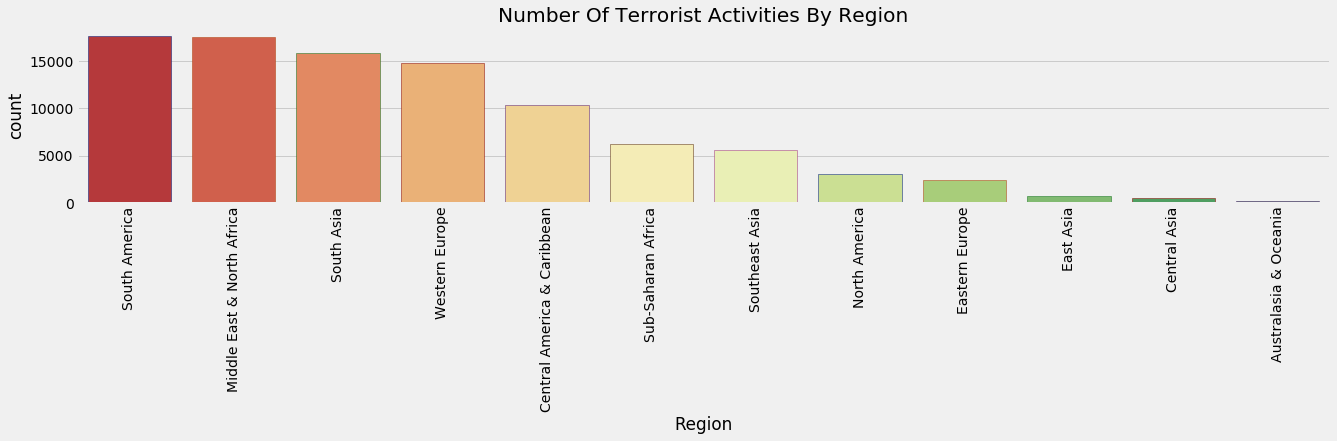

In [32]:
plt.subplots(figsize=(20,3))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

### Top countries affected by terrorism

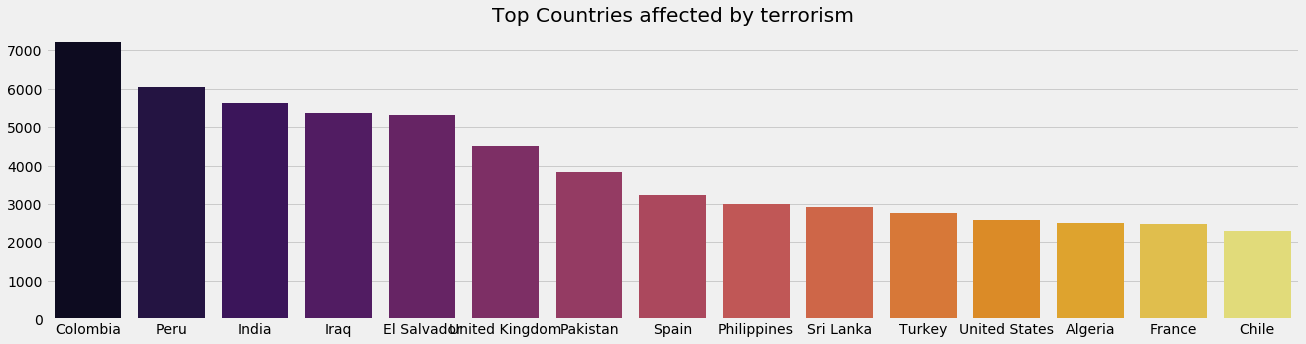

In [34]:
plt.subplots(figsize=(20,5))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Countries affected by terrorism')
plt.show()

### Terrorist Groups with Highest Terror Attacks

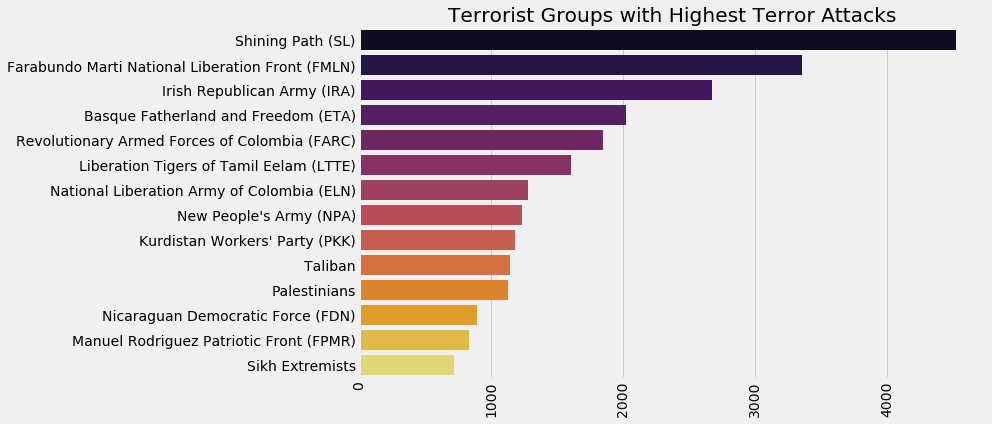

In [36]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

### Terror Activities in India

In [2]:
terror_india=terror[terror['Country']=='India']
terror_india_fol=terror_india.copy()
terror_india_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_ind=terror_india_fol[['latitude','longitude']][:5000]
city_ind=terror_india_fol['city'][:5000]
killed_ind=terror_india_fol['Killed'][:5000]
wound_ind=terror_india_fol['Wounded'][:5000]
target_ind=terror_india_fol['Target_type'][:5000]

map4 = folium.Map(location=[20.59, 78.96],tiles='CartoDB dark_matter',zoom_start=4.5)
for point in location_ind.index:
    folium.CircleMarker(list(location_ind.loc[point].values),popup='<b>City: </b>'+str(city_ind[point])+'<br><b>Killed: </b>'+str(killed_ind[point])+\
                        '<br><b>Injured: </b>'+str(wound_ind[point])+'<br><b>Target: </b>'+str(target_ind[point]),radius=point_size(killed_ind[point]),color=color_point(killed_ind[point]),fill_color=color_point(killed_ind[point])).add_to(map4)
map4

NameError: name 'terror' is not defined